In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Change seaborn styling.

In [2]:
sns.set_theme(
    style='ticks',
    context='paper',
    rc={"axes.spines.right": False, "axes.spines.top": False},
    font_scale=1.8,
)
np.random.seed(98)

POINT_SIZE = 6
POINT_COLOR = '#454545'

Read in pellet mass data.

In [3]:
df = pd.read_csv('../data/pellet_mass.csv')
df['pellet_mass'] = df['tube + pellet mass (mg)'] - df['empty tube mass (mg)']
sample_order = ['liquid', 'semisolid', 'low-density spread', 'high-density spread', 'bead spread']

Plot N80 library pellet masses.

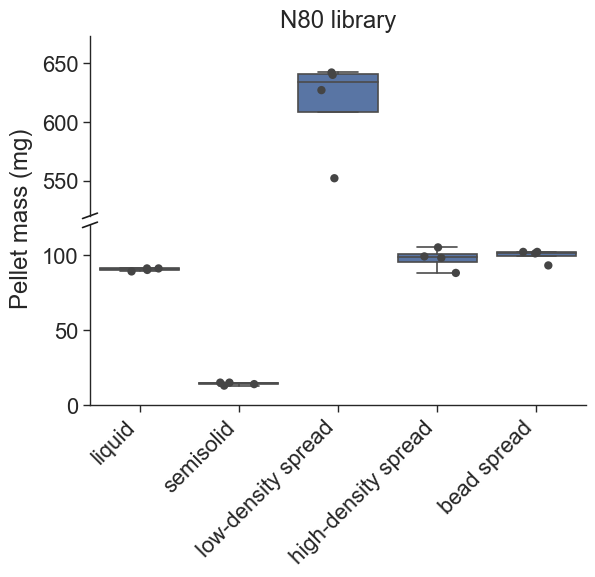

In [4]:
N80_df = df[df['library'] == 'N80']

f, (ax_top, ax_bottom) = plt.subplots(ncols=1, nrows=2, sharex=False, gridspec_kw={'hspace':0.05})
sns.boxplot(data=N80_df, x='condition', y='pellet_mass', order=sample_order, color=sns.color_palette()[0], fliersize=0, ax=ax_top)
sns.stripplot(data=N80_df, x='condition', y='pellet_mass', order=sample_order, color=POINT_COLOR, size=POINT_SIZE, jitter=0.2, ax=ax_top)
sns.boxplot(data=N80_df, x='condition', y='pellet_mass', order=sample_order, color=sns.color_palette()[0], fliersize=0, ax=ax_bottom)
sns.stripplot(data=N80_df, x='condition', y='pellet_mass', order=sample_order, color=POINT_COLOR, size=POINT_SIZE, jitter=0.2, ax=ax_bottom)

ax_top.set_ylim(bottom=520)
ax_bottom.set_ylim(0,120)
sns.despine(ax=ax_bottom)
sns.despine(ax=ax_top, bottom=True)
ax_top.set_xticks([]) # remove floating ticks

d = .015 
kwargs = dict(transform=ax_top.transAxes, color='k', clip_on=False)
ax_top.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
kwargs.update(transform=ax_bottom.transAxes)  # switch to the bottom axes
ax_bottom.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal

# remove y axis label
ax_top.set_ylabel('')
ax_bottom.set_ylabel('')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
f.text(0, 0.5, 'Pellet mass (mg)', va='center', rotation='vertical')
ax_top.set_title('N80 library')
plt.savefig('images/N80_pellet_mass.svg', format='svg')
plt.show()

Plot MORF library pellet masses.

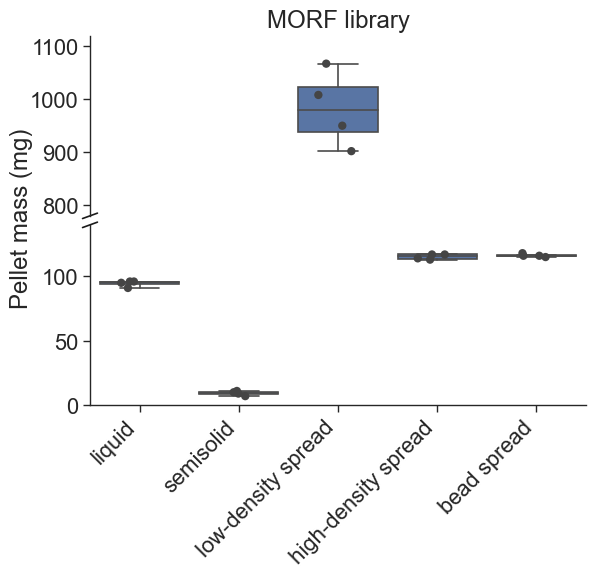

In [5]:
MORF_df = df[df['library'] == 'MORF']

f, (ax_top, ax_bottom) = plt.subplots(ncols=1, nrows=2, sharex=False, gridspec_kw={'hspace':0.05})
sns.boxplot(data=MORF_df, x='condition', y='pellet_mass', order=sample_order, color=sns.color_palette()[0], fliersize=0, ax=ax_top)
sns.stripplot(data=MORF_df, x='condition', y='pellet_mass', order=sample_order, color=POINT_COLOR, size=POINT_SIZE, jitter=0.2, ax=ax_top)
sns.boxplot(data=MORF_df, x='condition', y='pellet_mass', order=sample_order, color=sns.color_palette()[0], fliersize=0, ax=ax_bottom)
sns.stripplot(data=MORF_df, x='condition', y='pellet_mass', order=sample_order, color=POINT_COLOR, size=POINT_SIZE, jitter=0.2, ax=ax_bottom)

ax_top.set_ylim(bottom=780)
ax_bottom.set_ylim(0,140)
sns.despine(ax=ax_bottom)
sns.despine(ax=ax_top, bottom=True)
ax_top.set_xticks([]) # remove floating ticks

d = .015 
kwargs = dict(transform=ax_top.transAxes, color='k', clip_on=False)
ax_top.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
kwargs.update(transform=ax_bottom.transAxes)  # switch to the bottom axes
ax_bottom.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal

# remove y axis label
ax_top.set_ylabel('')
ax_bottom.set_ylabel('')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
f.text(0, 0.5, 'Pellet mass (mg)', va='center', rotation='vertical')
ax_top.set_title('MORF library')
plt.savefig('images/MORF_pellet_mass.svg', format='svg')
plt.show()